In [5]:
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import cross_validate
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# a) and b)

In [6]:
df = pd.read_csv('/kaggle/input/the-movies-dataset/ratings_small.csv')
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

In [7]:
data

In [15]:
def evaluate_model(algo, data):
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    avg_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
    avg_mae = sum(results['test_mae']) / len(results['test_mae'])
    print(f"  Average RMSE: {avg_rmse:.4f}")
    print(f"  Average MAE : {avg_mae:.4f}\n")
    return avg_rmse, avg_mae



# c) and d)

In [17]:
print("Average MAE and RMSE of the Probabilistic Matrix Factorization (PMF):")
pmf_results = evaluate_model(SVD(), data)

user_cf = KNNBasic(sim_options={'user_based': True})
print("Average MAE and RMSE of the User based Collaborative Filtering:")
user_cf_results = evaluate_model(user_cf, data)

item_cf = KNNBasic(sim_options={'user_based': False})
print("Average MAE and RMSE of the Item-Based Collaborative Filtering:")
item_cf_results = evaluate_model(item_cf, data)

Average MAE and RMSE of the Probabilistic Matrix Factorization (PMF):
  Average RMSE: 0.8974
  Average MAE : 0.6912

Average MAE and RMSE of the User based Collaborative Filtering:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
  Average RMSE: 0.9698
  Average MAE : 0.7449

Average MAE and RMSE of the Item-Based Collaborative Filtering:
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [19]:
similarities = ['cosine', 'msd', 'pearson']
results_user = {}
results_item = {}

for sim in similarities:
    algo_user = KNNBasic(sim_options={'name': sim, 'user_based': True})
    user_result = cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    results_user[sim] = {
        'RMSE': sum(user_result['test_rmse']) / 5,
        'MAE': sum(user_result['test_mae']) / 5
    }
    
    algo_item = KNNBasic(sim_options={'name': sim, 'user_based': False})
    item_result = cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    results_item[sim] = {
        'RMSE': sum(item_result['test_rmse']) / 5,
        'MAE': sum(item_result['test_mae']) / 5
    }


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd sim

In [21]:
results_user 

{'cosine': {'RMSE': 0.994395505221941, 'MAE': 0.768118507782524},
 'msd': {'RMSE': 0.9658967036496028, 'MAE': 0.7423095572920978},
 'pearson': {'RMSE': 0.9989707628722325, 'MAE': 0.7732020638464078}}

In [22]:
results_item 

{'cosine': {'RMSE': 0.9941720388848745, 'MAE': 0.7732458418012377},
 'msd': {'RMSE': 0.9350653569588511, 'MAE': 0.7211804740260491},
 'pearson': {'RMSE': 0.9897934997134804, 'MAE': 0.7686516810284576}}

# e)

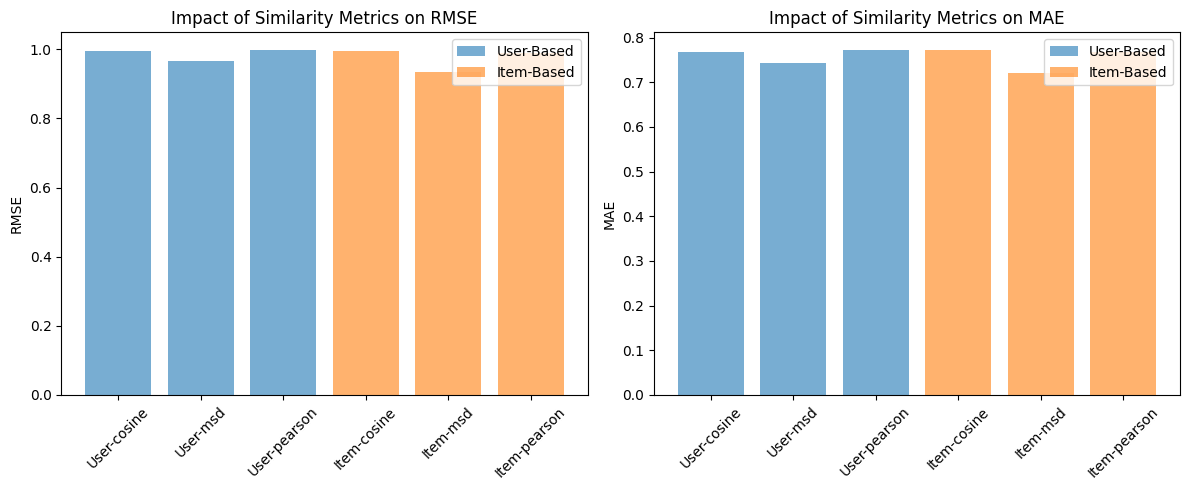

In [20]:
# Plotting RMSE comparison
plt.figure(figsize=(12, 5))

# RMSE plot
plt.subplot(1, 2, 1)
plt.title("Impact of Similarity Metrics on RMSE")
plt.bar([f"User-{sim}" for sim in similarities], [results_user[sim]['RMSE'] for sim in similarities], label='User-Based', alpha=0.6)
plt.bar([f"Item-{sim}" for sim in similarities], [results_item[sim]['RMSE'] for sim in similarities], label='Item-Based', alpha=0.6)
plt.ylabel("RMSE")
plt.legend()
plt.xticks(rotation=45)

# MAE plot
plt.subplot(1, 2, 2)
plt.title("Impact of Similarity Metrics on MAE")
plt.bar([f"User-{sim}" for sim in similarities], [results_user[sim]['MAE'] for sim in similarities], label='User-Based', alpha=0.6)
plt.bar([f"Item-{sim}" for sim in similarities], [results_item[sim]['MAE'] for sim in similarities], label='Item-Based', alpha=0.6)
plt.ylabel("MAE")
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [23]:
k_values = [10, 20, 30, 40, 50]
user_k_results = {'k': [], 'RMSE': [], 'MAE': []}
item_k_results = {'k': [], 'RMSE': [], 'MAE': []}

for k in k_values:
    # User-based CF
    user_algo = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': True})
    user_cv = cross_validate(user_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    user_k_results['k'].append(k)
    user_k_results['RMSE'].append(sum(user_cv['test_rmse']) / 5)
    user_k_results['MAE'].append(sum(user_cv['test_mae']) / 5)

    # Item-based CF
    item_algo = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': False})
    item_cv = cross_validate(item_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
    item_k_results['k'].append(k)
    item_k_results['RMSE'].append(sum(item_cv['test_rmse']) / 5)
    item_k_results['MAE'].append(sum(item_cv['test_mae']) / 5)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [25]:
user_k_results  

{'k': [10, 20, 30, 40, 50],
 'RMSE': [1.0110734307701932,
  0.9977937106997812,
  0.9934443376046534,
  0.9938884876753218,
  0.9940429272087435],
 'MAE': [0.7794196459256808,
  0.7686547847568718,
  0.7667877499782291,
  0.7675130047681874,
  0.7682560706336347]}

In [26]:
item_k_results

{'k': [10, 20, 30, 40, 50],
 'RMSE': [1.0497801704937533,
  1.016692831557279,
  1.0024534881978486,
  0.9934384353987493,
  0.9917089571640693],
 'MAE': [0.8201201870673331,
  0.7936289748601696,
  0.7809505312187246,
  0.7728100152065498,
  0.7712751385962331]}

# f)

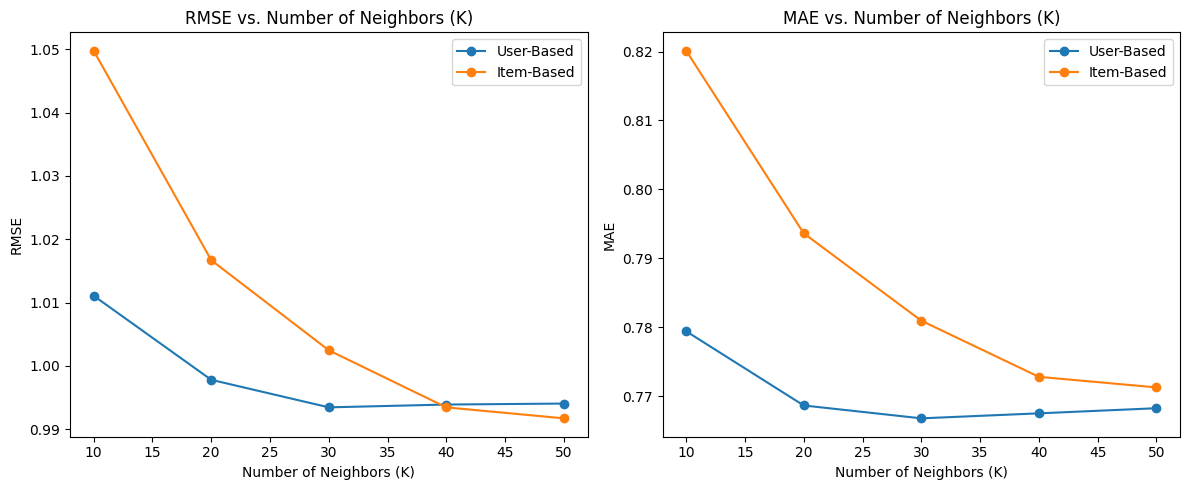

In [24]:
# Plot RMSE and MAE vs. K
plt.figure(figsize=(12, 5))

# RMSE plot
plt.subplot(1, 2, 1)
plt.plot(user_k_results['k'], user_k_results['RMSE'], label='User-Based', marker='o')
plt.plot(item_k_results['k'], item_k_results['RMSE'], label='Item-Based', marker='o')
plt.title("RMSE vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("RMSE")
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(user_k_results['k'], user_k_results['MAE'], label='User-Based', marker='o')
plt.plot(item_k_results['k'], item_k_results['MAE'], label='Item-Based', marker='o')
plt.title("MAE vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()


# g)

In [27]:
best_k_user = user_k_results['k'][user_k_results['RMSE'].index(min(user_k_results['RMSE']))]
best_rmse_user = min(user_k_results['RMSE'])

best_k_item = item_k_results['k'][item_k_results['RMSE'].index(min(item_k_results['RMSE']))]
best_rmse_item = min(item_k_results['RMSE'])

print(f"Best K for User-Based CF: {best_k_user} (RMSE = {best_rmse_user:.4f})")
print(f"Best K for Item-Based CF: {best_k_item} (RMSE = {best_rmse_item:.4f})")


Best K for User-Based CF: 30 (RMSE = 0.9934)
Best K for Item-Based CF: 50 (RMSE = 0.9917)
